# CSE 158, Fall 2019: Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
train = pd.read_csv('data/train.csv')

test_labels = pd.read_csv('data/test_labels.csv')
test_labels = test_labels[(test_labels[['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] != -1).all(axis=1)]
test = pd.merge(test_labels, pd.read_csv('test.csv'), on='id', how='inner')

In [3]:
train.shape, test.shape

((159571, 8), (63978, 8))

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding. I think very high...
1,000247e83dcc1211,0,0,0,0,0,0,:Dear god this site is horrible.
2,0002f87b16116a7f,0,0,0,0,0,0,"""::: Somebody will invariably try to add Relig..."
3,0003e1cccfd5a40a,0,0,0,0,0,0,""" \n\n It says it right there that it IS a typ..."
4,00059ace3e3e9a53,0,0,0,0,0,0,""" \n\n == Before adding a new product to the l..."


In [6]:
train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [7]:
test.isnull().any()

id               False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
comment_text     False
dtype: bool

## 1. Data Visualization

### 1.1 Bar Chart

To see what type of comments occur most frequently

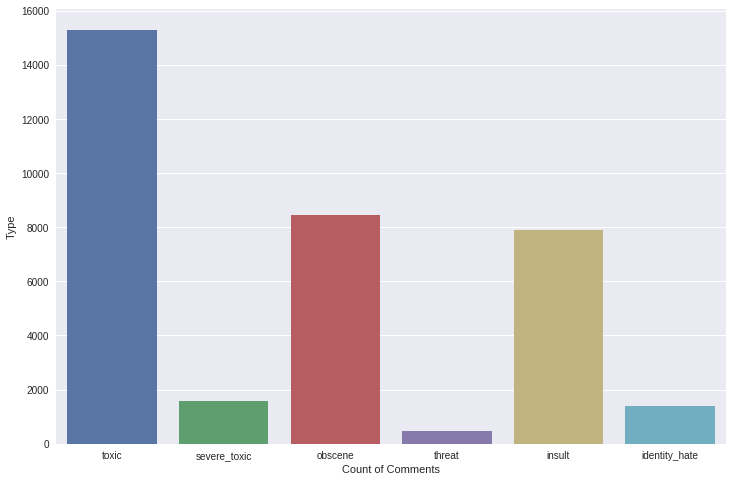

In [8]:
x = train.iloc[:,2:].sum()

plt.figure(figsize=(12,8))
ax = sns.barplot(x.index, x.values)
plt.xlabel('Count of Comments')
plt.ylabel('Type')
# plt.savefig('barchart.png', dpi=600)

plt.show()

In [9]:
x.values

array([15294,  1595,  8449,   478,  7877,  1405])

In [10]:
print(str(len(train)) + " rows.")
print("- " + str(len(train[train.toxic==1])) + " rows are toxic")
print("- " + str(len(train[train.severe_toxic==1])) + " rows are severe toxic")
print("- " + str(len(train[train.obscene==1])) + " rows are obscene")
print("- " + str(len(train[train.threat==1])) + " rows are threat")
print("- " + str(len(train[train.insult==1])) + " rows are insult")
print("- " + str(len(train[train.identity_hate==1])) + " rows are identity hate")

159571 rows.
- 15294 rows are toxic
- 1595 rows are severe toxic
- 8449 rows are obscene
- 478 rows are threat
- 7877 rows are insult
- 1405 rows are identity hate


In [11]:
print("toxic examples:")
train[train['toxic']==1]['comment_text'][:5]

toxic examples:


6          COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12    Hey... what is it..\n@ | talk .\nWhat is it......
16    Bye! \n\nDon't look, come or think of comming ...
42    You are gay or antisemmitian? \n\nArchangel WH...
43             FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
Name: comment_text, dtype: object

In [12]:
print("severe_toxic examples:")
train[train['severe_toxic']==1]['comment_text'][:5]

severe_toxic examples:


6           COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
55     Stupid peace of shit stop deleting my stuff as...
181    you are a stupid fuck \n\nand your mother's cu...
442         Hi \n\nIm a fucking bitch.\n\n50.180.208.181
579    What a motherfucking piece of crap those fuckh...
Name: comment_text, dtype: object

In [13]:
print("obscene examples:")
train[train['obscene']==1]['comment_text'][:5]

obscene examples:


6          COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
42    You are gay or antisemmitian? \n\nArchangel WH...
43             FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
51    GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK T...
55    Stupid peace of shit stop deleting my stuff as...
Name: comment_text, dtype: object

In [14]:
print("threat examples:")
train[train['threat']==1]['comment_text'][:5]

threat examples:


79      Hi! I am back again!\nLast warning!\nStop undo...
176     I think that your a Fagget get a oife and burn...
600     I'm also a sock puppet of this account...SUPRI...
802     Fuck you, Smith. Please have me notified when ...
1017    WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...
Name: comment_text, dtype: object

In [15]:
print("insult examples:")
train[train['insult']==1]['comment_text'][:5]

insult examples:


6          COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
42    You are gay or antisemmitian? \n\nArchangel WH...
43             FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
55    Stupid peace of shit stop deleting my stuff as...
56    =Tony Sidaway is obviously a fistfuckee. He lo...
Name: comment_text, dtype: object

In [16]:
print("identity hate examples:")
train[train['identity_hate']==1]['comment_text'][:5]

identity hate examples:


42     You are gay or antisemmitian? \n\nArchangel WH...
105           A pair of jew-hating weiner nazi schmucks.
176    I think that your a Fagget get a oife and burn...
218    Kill all niggers. \n\nI have hard, that others...
238    u r a tw@ fuck off u gay boy.U r smelly.Fuck u...
Name: comment_text, dtype: object

### 1.2 Correlation Matrix

"Toxic" comments are clearly correlated with both "obscene" and "insult" comments.

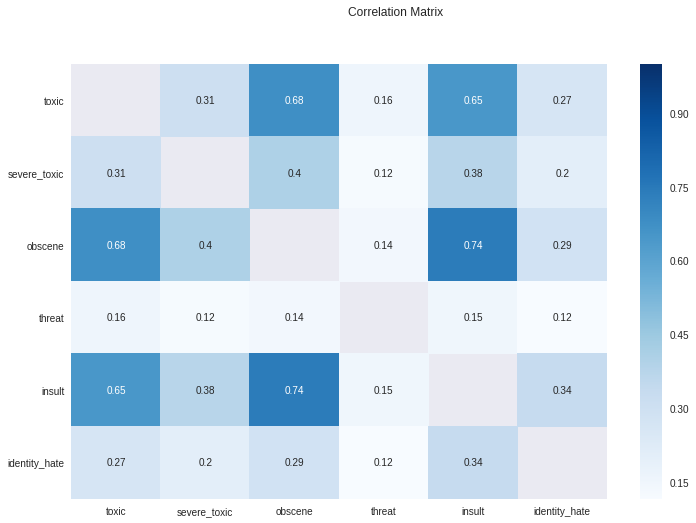

In [17]:
columns = list(x.index)
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Correlation Matrix')
sns.heatmap(train[columns].corr(), annot=True, cmap="Blues", mask=train[columns].corr()>=1)

label_y = ax.get_yticklabels()
plt.setp(label_y , rotation = 360)
# plt.savefig('correlationMatrix.png', dpi=600)

### 1.3 Venn Diagram

Visualize overlaps

In [18]:
from matplotlib_venn import venn3
from matplotlib_venn import venn3_circles

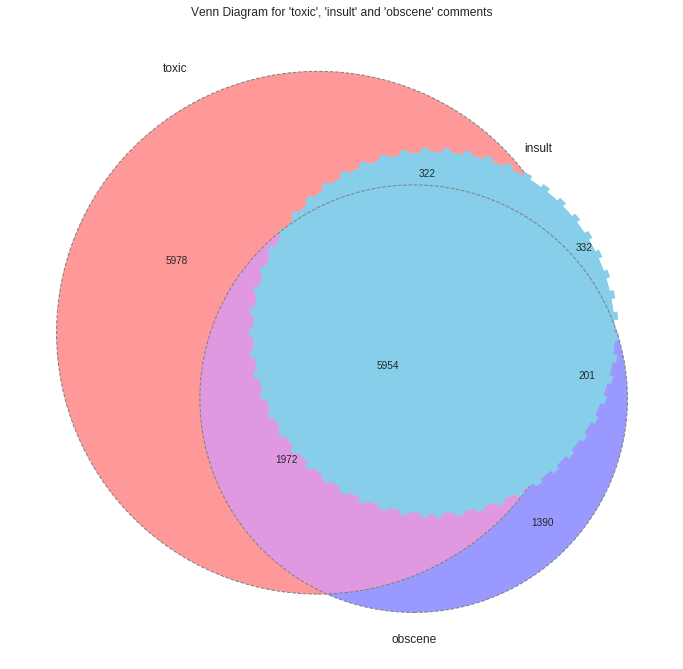

In [19]:
# build combinations
a = train[(train['toxic']==1) & (train['insult']==0) & (train['obscene']==0)].shape[0]
b = train[(train['toxic']==0) & (train['insult']==1) & (train['obscene']==0)].shape[0]
c = train[(train['toxic']==0) & (train['insult']==0) & (train['obscene']==1)].shape[0]

ab = train[(train['toxic']==1) & (train['insult']==1) & (train['obscene']==0)].shape[0]
ac = train[(train['toxic']==1) & (train['insult']==0) & (train['obscene']==1)].shape[0]
bc = train[(train['toxic']==0) & (train['insult']==1) & (train['obscene']==1)].shape[0]

abc = train[(train['toxic']==1) & (train['insult']==1) & (train['obscene']==1)].shape[0]

# plot venn diagrams
plt.figure(figsize=(12, 12))
plt.title("Venn Diagram for 'toxic', 'insult' and 'obscene' comments")

v=venn3(subsets=(a, b, c, ab, ac, bc, abc),  set_labels=('toxic', 'insult', 'obscene'))

vc=venn3_circles(subsets=(a, b, c, ab, ac, bc, abc), linestyle='dashed', linewidth=1, color="grey")
vc[1].set_lw(8.0)
vc[1].set_ls('dotted')
vc[1].set_color('skyblue')

# plt.savefig('venn.png', dpi=600)
plt.show();

### 1.4 Word Clouds

In [20]:
from wordcloud import WordCloud
from collections import Counter

import imageio
import re
import string

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/cui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
word_counter = {}

def clean_text(text):
    text = text.lower()
    text = [c for c in text if not (c in string.punctuation)]
    text = ''.join(text)
    words = text.strip().split()
    
    return ' '.join([word for word in words if word not in (stop)])

In [22]:
columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

for col in columns:    
    text = Counter()        
    
    # applying the clean-function to each column's comments
    train[train[col] == 1]['comment_text'].apply(lambda t: text.update(clean_text(t).split()))
    
    # combining all to one dataframe
    word_counter[col] = pd.DataFrame.from_dict(text, orient='index').rename(columns={0: 'count'}).sort_values('count', ascending=False)

In [23]:
def wordCloudShow(wordType):
    color_mask = imageio.imread('./background.jpg')
    wc_list = word_counter[wordType]
    
    wordcloud = WordCloud(background_color='white', max_words=150,mask=color_mask, max_font_size=100, random_state=6)\
                          .generate_from_frequencies(wc_list.to_dict()['count'])

    fig = plt.figure(figsize=(12, 8))
    plt.title('\n' + wordType + '\n', fontsize=20, fontweight='bold')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
#     plt.savefig(wordType + '.png', dpi=600)
    plt.show()

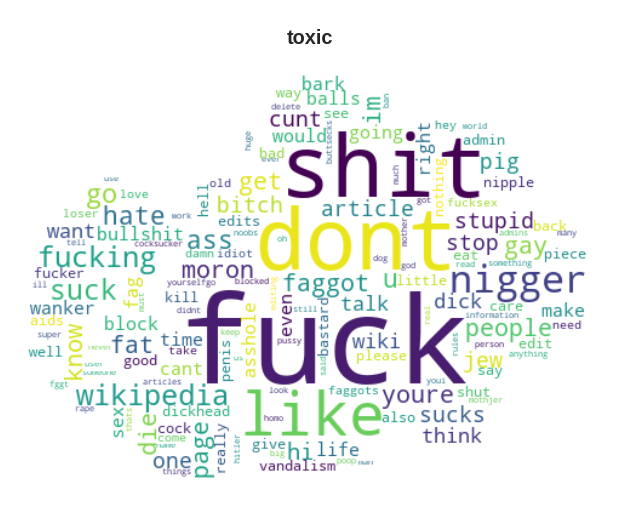

In [24]:
wordCloudShow('toxic')

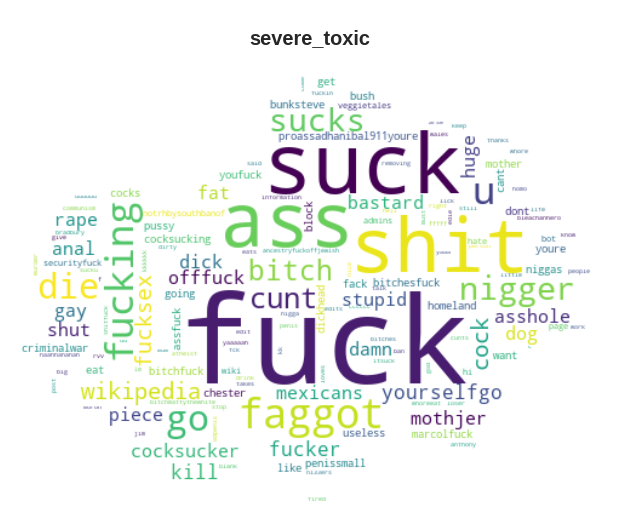

In [25]:
wordCloudShow('severe_toxic')

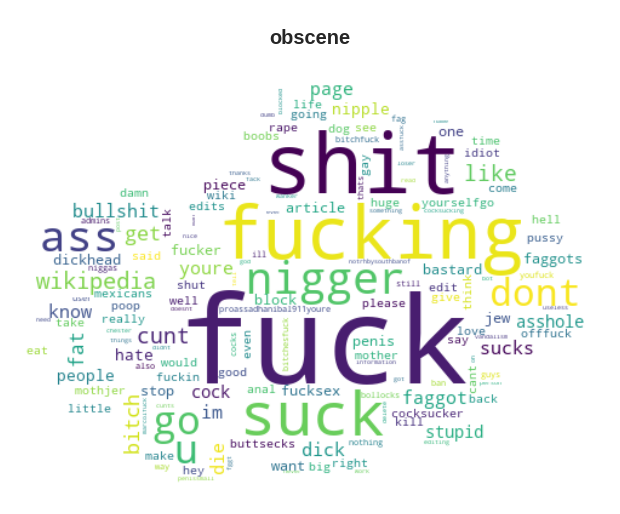

In [26]:
wordCloudShow('obscene')

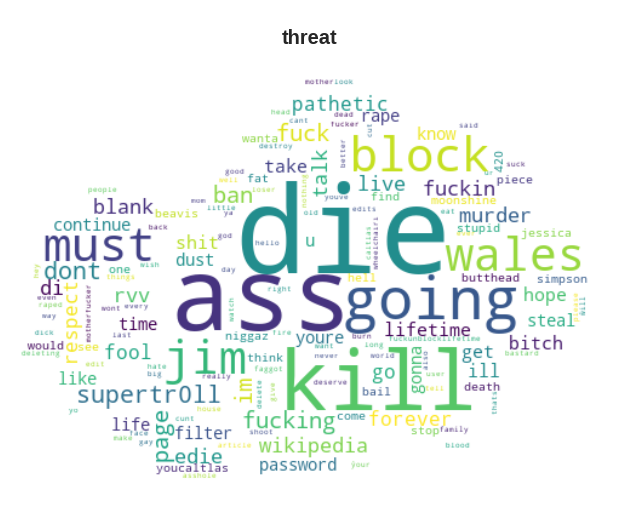

In [27]:
wordCloudShow('threat')

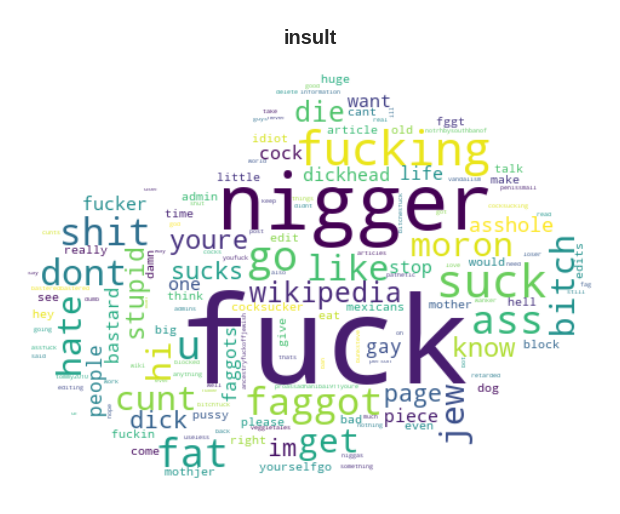

In [28]:
wordCloudShow('insult')

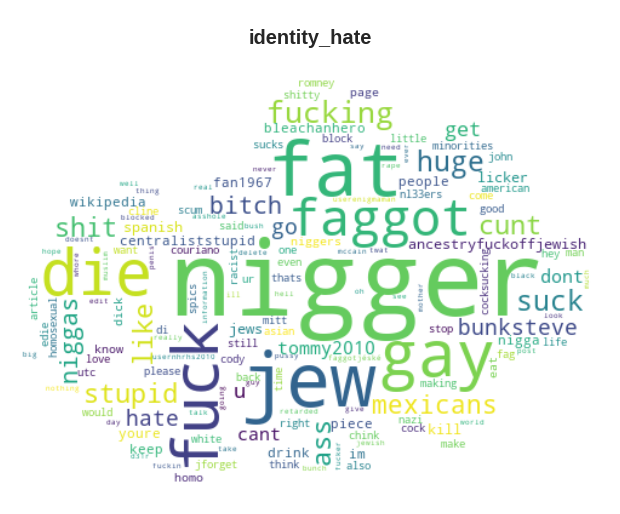

In [29]:
wordCloudShow('identity_hate')

## 2. Preprocessing the data

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [31]:
X_train = train["comment_text"].values
y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
X_test  = test["comment_text"].values
y_test  = test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [32]:
# number of unique words we want to use
max_features = 20000 

# tokenizing the data
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))

# turning the tokenized text into sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test  = tokenizer.texts_to_sequences(X_test)

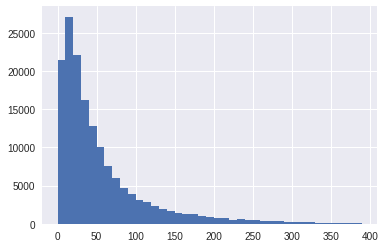

In [33]:
# distribution of number of words in sentence
totalNumWords = [len(words) for words in X_train]
plt.hist(totalNumWords, bins = np.arange(0, 400, 10))
# plt.savefig('wordLenght.png', dpi=600)

In [34]:
# set the "maxlen" to about 200 includes most of the sentences
max_len = 200 

# padding the sequences
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test  = sequence.pad_sequences(X_test,  maxlen=max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (159571, 200)
X_test shape:  (63978, 200)


In [35]:
X_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

## 3. Evaluating different neural networks - NN, CNN, RNN

In [36]:
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam

In [37]:
def pltHistory(history, modelType):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
#     plt.savefig(modelType + '.png', dpi=600)
    plt.show()

In [38]:
def base_model(max_features, max_len, embedding_dims):
    # instantiate NN model
    model = Sequential()

    # add embedding layer 
    model.add(Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims))

    # add pooling layer 
    model.add(GlobalMaxPool1D())

    # add dense layer to produce an output dimension of 50 and apply relu activation
    model.add(Dense(50, activation='relu'))

    # set the regularizing dropout layer to drop out 30% of the nodes
    model.add(Dropout(0.3))

    # finally add a dense layer
    model.add(Dense(6, activation='sigmoid'))
    
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [39]:
# dimension of the embedding variable
embedding_dims = 128

In [40]:
base_model = base_model(max_features, max_len, embedding_dims)
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 306       
Total params: 2,566,756
Trainable params: 2,566,756
Non-trainable params: 0
_________________________________________________________________


In [38]:
base_hist = base_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

/home/cui/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 143613 samples, validate on 15958 samples
Epoch 1/5
143613/143613 [==============================] - 134s 932us/step - loss: 0.0813 - accuracy: 0.9743 - val_loss: 0.0551 - val_accuracy: 0.9803
Epoch 2/5
143613/143613 [==============================] - 135s 937us/step - loss: 0.0494 - accuracy: 0.9818 - val_loss: 0.0510 - val_accuracy: 0.9810
Epoch 3/5
143613/143613 [==============================] - 135s 939us/step - loss: 0.0441 - accuracy: 0.9832 - val_loss: 0.0506 - val_accuracy: 0.9820
Epoch 4/5
143613/143613 [==============================] - 131s 914us/step - loss: 0.0402 - accuracy: 0.9843 - val_loss: 0.0496 - val_accuracy: 0.9818
Epoch 5/5
143613/143613 [==============================] - 130s 903us/step - loss: 0.0370 - accuracy: 0.9854 - val_loss: 0.0494 - val_accuracy: 0.9822


In [39]:
# evaluate the algorithm on the test dataset
base_test_loss, base_test_accuracy = base_model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', base_test_loss)
print('Test Accuracy:', base_test_accuracy)

63978/63978 [==============================] - 2s 30us/step
Test Loss:     0.07238685944232286
Test Accuracy: 0.970886766910553


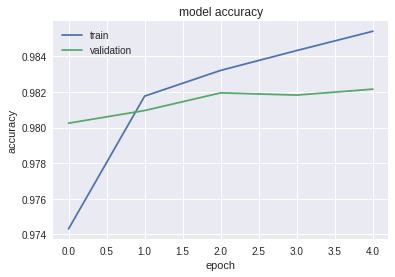

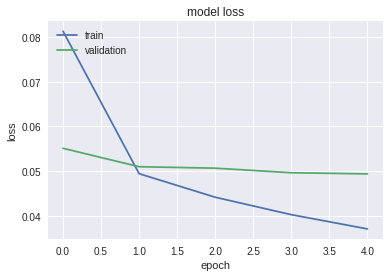

In [40]:
pltHistory(base_hist, "base")

In [41]:
def cnn_model(max_features, max_len, embedding_dims):
    # instantiate CNN model
    model = Sequential()

    # add embedding layer 
    model.add(Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims))
 
    # set the dropout layer to drop out 50% of the nodes
    model.add(SpatialDropout1D(0.5))

    # add convolutional layer that has ...
    model.add(Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'))

    # add normalization layer
    model.add(BatchNormalization())

    # add pooling layer 
    model.add(GlobalMaxPool1D())

    # set the dropout layer to drop out 50% of the nodes
    model.add(Dropout(0.5))

    # add dense layer to produce an output dimension of 50 and using relu activation
    model.add(Dense(50, activation='relu'))

    # finally add a dense layer
    model.add(Dense(6, activation='sigmoid'))
    
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [42]:
cnn_model = cnn_model(max_features, max_len, embedding_dims)
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 100)          51300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 100)          400       
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)               

In [43]:
cnn_hist = cnn_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

/home/cui/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 143613 samples, validate on 15958 samples
Epoch 1/5
143613/143613 [==============================] - 214s 1ms/step - loss: 0.0740 - accuracy: 0.9761 - val_loss: 0.0550 - val_accuracy: 0.9807
Epoch 2/5
143613/143613 [==============================] - 211s 1ms/step - loss: 0.0549 - accuracy: 0.9805 - val_loss: 0.0535 - val_accuracy: 0.9810
Epoch 3/5
143613/143613 [==============================] - 222s 2ms/step - loss: 0.0515 - accuracy: 0.9816 - val_loss: 0.0521 - val_accuracy: 0.9816
Epoch 4/5
143613/143613 [==============================] - 221s 2ms/step - loss: 0.0493 - accuracy: 0.9822 - val_loss: 0.0519 - val_accuracy: 0.9817
Epoch 5/5
143613/143613 [==============================] - 212s 1ms/step - loss: 0.0474 - accuracy: 0.9828 - val_loss: 0.0517 - val_accuracy: 0.9821


In [44]:
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', cnn_test_loss)
print('Test Accuracy:', cnn_test_accuracy)

63978/63978 [==============================] - 14s 225us/step
Test Loss:     0.07393409196841605
Test Accuracy: 0.9708314538002014


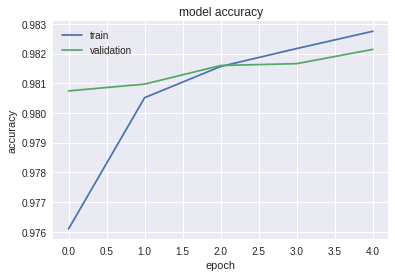

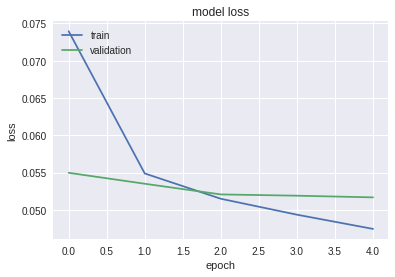

In [45]:
pltHistory(cnn_hist, "cnn")

In [46]:
def rnn_model(max_features, max_len, embedding_dims):
    # instantiate RNN model
    model = Sequential()

    # add embedding layer 
    model.add(Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims))

    # set the dropout layer to drop out 50% of the nodes
    model.add(SpatialDropout1D(0.5))

    # add bidirectional layer and pass in an LSTM()
    model.add(Bidirectional(LSTM(25, return_sequences=True)))

    # add normalization layer
    model.add(BatchNormalization())

    # add pooling layer 
    model.add(GlobalMaxPool1D())

    # set the dropout layer to drop out 50% of the nodes
    model.add(Dropout(0.5))

    # add dense layer to produce an output dimension of 50 and using relu activation
    model.add(Dense(50, activation='relu'))

    # finally add a dense layer
    model.add(Dense(6, activation='sigmoid'))
    
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [47]:
rnn_model = rnn_model(max_features, max_len, embedding_dims)
rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 128)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 50)           30800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)               

In [48]:
rnn_hist = rnn_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

/home/cui/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 143613 samples, validate on 15958 samples
Epoch 1/5
143613/143613 [==============================] - 408s 3ms/step - loss: 0.0702 - accuracy: 0.9768 - val_loss: 0.0533 - val_accuracy: 0.9808
Epoch 2/5
143613/143613 [==============================] - 405s 3ms/step - loss: 0.0510 - accuracy: 0.9816 - val_loss: 0.0510 - val_accuracy: 0.9812
Epoch 3/5
143613/143613 [==============================] - 410s 3ms/step - loss: 0.0474 - accuracy: 0.9826 - val_loss: 0.0506 - val_accuracy: 0.9818
Epoch 4/5
143613/143613 [==============================] - 409s 3ms/step - loss: 0.0449 - accuracy: 0.9832 - val_loss: 0.0506 - val_accuracy: 0.9811
Epoch 5/5
143613/143613 [==============================] - 410s 3ms/step - loss: 0.0430 - accuracy: 0.9840 - val_loss: 0.0486 - val_accuracy: 0.9822


In [49]:
rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', rnn_test_loss)
print('Test Accuracy:', rnn_test_accuracy)

63978/63978 [==============================] - 33s 520us/step
Test Loss:     0.07577045064444779
Test Accuracy: 0.9692083597183228


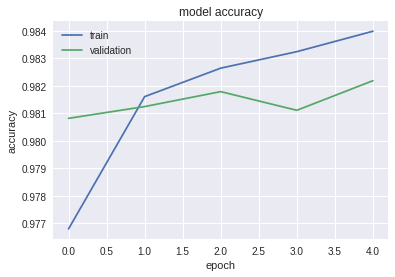

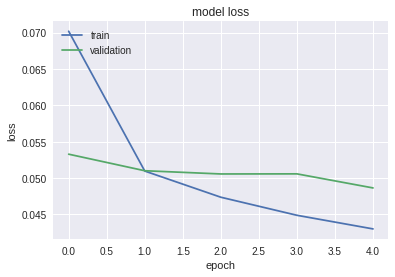

In [50]:
pltHistory(rnn_hist, "rnn")

## 4. Conclusion

In [51]:
# concat all training, validation and testing accuracy scores
accuracy_nn = ['NN', np.mean(base_hist.history["accuracy"]), np.mean(base_hist.history['val_accuracy']), base_test_accuracy]
accuracy_cnn = ['CNN', np.mean(cnn_hist.history['accuracy']), np.mean(cnn_hist.history['val_accuracy']), cnn_test_accuracy]
accuracy_rnn = ['RNN', np.mean(rnn_hist.history['accuracy']), np.mean(rnn_hist.history['val_accuracy']), rnn_test_accuracy]

# create dataframe
comparison = pd.DataFrame([accuracy_nn, accuracy_cnn, accuracy_rnn])
comparison.columns = ['Algorithm', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
comparison.set_index(['Algorithm'], inplace=True)

In [52]:
comparison

,Training Accuracy,Validation Accuracy,Testing Accuracy
Algorithm,,,
NN,0.981808,0.981430,0.970887
CNN,0.980618,0.981422,0.970831
RNN,0.981651,0.981426,0.969208
